In [1]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import os
import librosa

print(torch.__version__)
print(torchaudio.__version__)

2.3.0+cpu
2.3.0+cpu


In [2]:
str(torchaudio.get_audio_backend())

C:\Users\Brock\AppData\Local\Temp\ipykernel_6380\1190122611.py:1: UserWarning: torchaudio._backend.get_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  str(torchaudio.get_audio_backend())


'None'

In [3]:
torchaudio.set_audio_backend("soundfile")

C:\Users\Brock\AppData\Local\Temp\ipykernel_6380\1822137616.py:1: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("soundfile")


In [4]:
def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")

In [29]:
SAMPLE_SPEECH = "../slices/slice_127.wav"

In [30]:
metadata = torchaudio.info(SAMPLE_SPEECH)
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=176400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [31]:
# Load audio
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_SPEECH)

# Define transform
spectrogram = T.Spectrogram(n_fft=512)

# Perform transform
spec = spectrogram(SPEECH_WAVEFORM)

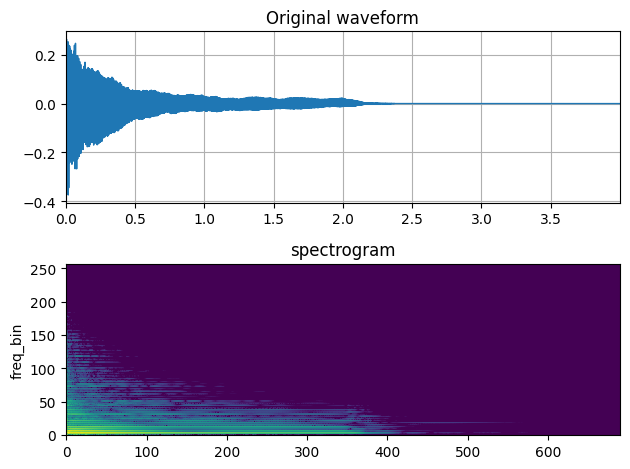

In [32]:
fig, axs = plt.subplots(2, 1)
plot_waveform(SPEECH_WAVEFORM, SAMPLE_RATE, title="Original waveform", ax=axs[0])
plot_spectrogram(spec[0], title="spectrogram", ax=axs[1])
fig.tight_layout()

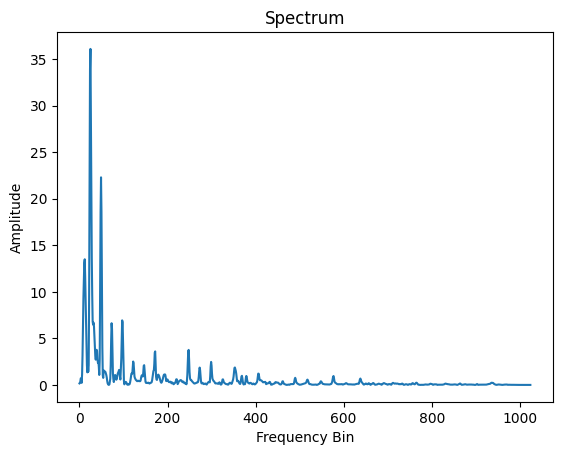

In [33]:
import numpy as np

y, sr = librosa.load(SAMPLE_SPEECH)
n_fft = 1024
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

In [34]:
n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128
sample_rate = metadata.sample_rate

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm="slaney",
    n_mels=n_mels,
    mel_scale="htk",
)

melspec = mel_spectrogram(SPEECH_WAVEFORM)

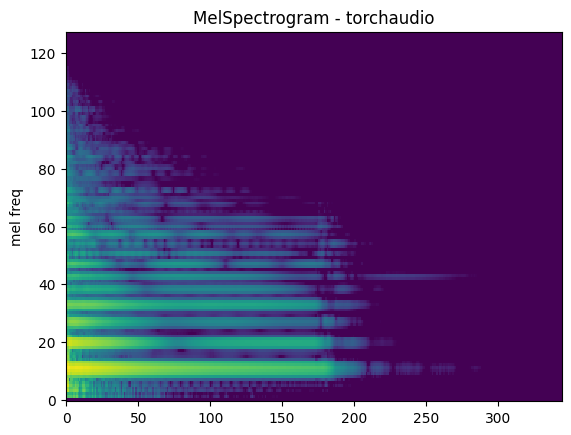

In [35]:
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [36]:
pitch = F.detect_pitch_frequency(SPEECH_WAVEFORM, sample_rate)

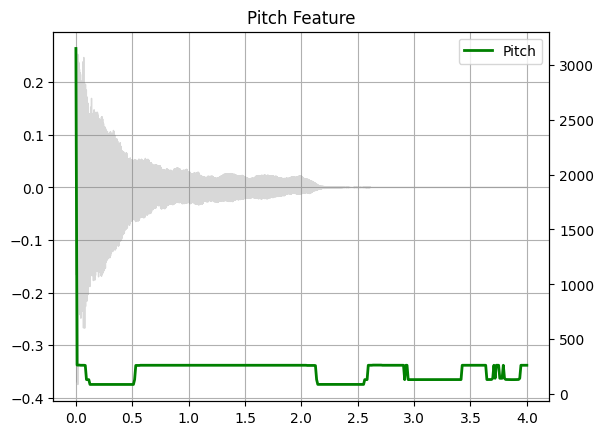

In [37]:
def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    axis2.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")

    axis2.legend(loc=0)


plot_pitch(SPEECH_WAVEFORM, SAMPLE_RATE, pitch)

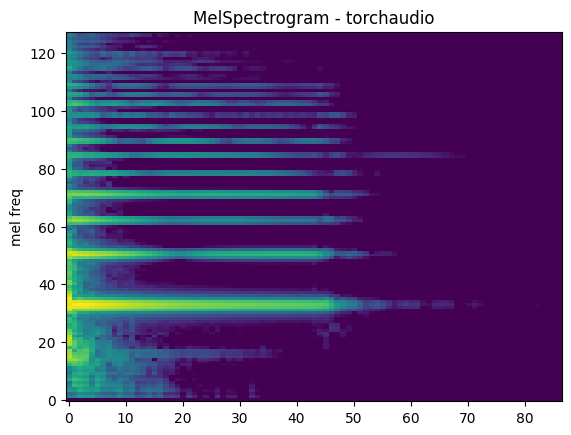

In [38]:
speech2 = torchaudio.functional.resample(SPEECH_WAVEFORM, sample_rate, sample_rate // 4)

melspec2 = mel_spectrogram(speech2)
plot_spectrogram(melspec2[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

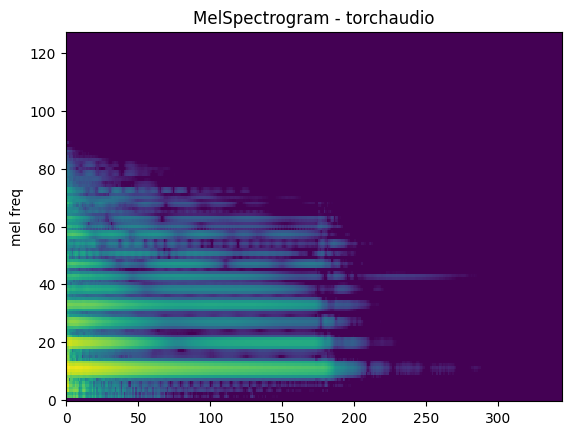

In [39]:
speech3 = torchaudio.functional.resample(speech2, sample_rate // 4, sample_rate)

melspec3 = mel_spectrogram(speech3)
plot_spectrogram(melspec3[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

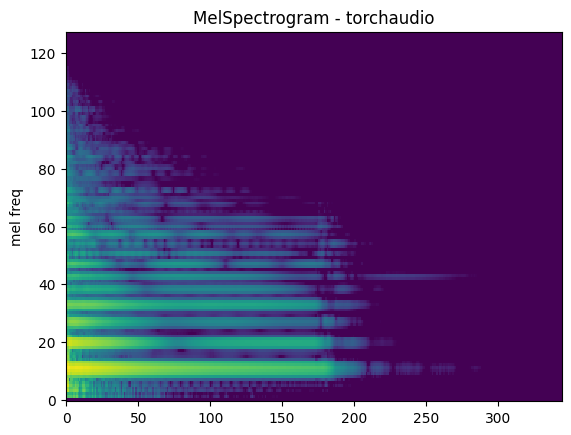

In [40]:
melspec = mel_spectrogram(SPEECH_WAVEFORM)
plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel="mel freq")

In [41]:
mse = torch.square(melspec3 - melspec).mean().item()
print(mse)
'{:.20f}'.format(mse)

6.542363735206891e-07


'0.00000065423637352069'

In [53]:
mse = torch.square(melspec - melspec).mean().item()
print(mse)

0.0


In [ ]:
torchaudio.save(path, waveform, sample_rate)

In [44]:
melspec[0].shape

torch.Size([128, 345])

In [66]:
melspec[0].max()

tensor(44.3512)

In [65]:
melspec[0].min()

tensor(0.)